# Analiza hribov in poti v Sloveniji

Najprej sem uvozil knjižnico Pandas, s katero sem opravil analizo podatkov. Uvozim in preberem csv datoteki s shranjenimi
hribi (hribi.csv) in potmi (potiMin.csv). Podatke za analizo sem zbral s pletnih strani in shranil v format csv s pomočjo skripte izlušči imena hribov.py. 

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.max_rows = 30

hribi = pd.read_csv('hribiPop.csv', delimiter=';', index_col='Ime')
poti = pd.read_csv('potiMin.csv', delimiter=';', index_col='Ime')


In [24]:
hribi.head(10)

,Gorovje,Višina,Število_poti,Vrsta_cilja
Ime,,,,
Ahac,"Goriško, Notranjsko in Snežniško hribovje",799,6,"'vrh', 'cerkev'"
Ajdovščina,"Goriško, Notranjsko in Snežniško hribovje",804,1,'vrh'
Ankaran,"Goriško, Notranjsko in Snežniško hribovje",18,3,''
Baba (pri Javornikih),"Goriško, Notranjsko in Snežniško hribovje",1085,2,'vrh'
Bela stena,"Goriško, Notranjsko in Snežniško hribovje",1122,1,'vrh'
Bele ovce,"Goriško, Notranjsko in Snežniško hribovje",1029,1,'vrh'
Bele stene,"Goriško, Notranjsko in Snežniško hribovje",863,2,''
Belovka,"Goriško, Notranjsko in Snežniško hribovje",848,2,'vrh'
Bezgarska planina,"Goriško, Notranjsko in Snežniško hribovje",895,4,'planina'


In [33]:
hribi = hribi.assign(row_number=range(len(hribi)))
hribi

,Gorovje,Višina,Število_poti,Vrsta_cilja,row_number
Ime,,,,,
Ahac,"Goriško, Notranjsko in Snežniško hribovje",799,6,"'vrh', 'cerkev'",0
Ajdovščina,"Goriško, Notranjsko in Snežniško hribovje",804,1,'vrh',1
Ankaran,"Goriško, Notranjsko in Snežniško hribovje",18,3,'',2
Baba (pri Javornikih),"Goriško, Notranjsko in Snežniško hribovje",1085,2,'vrh',3
Bela stena,"Goriško, Notranjsko in Snežniško hribovje",1122,1,'vrh',4
...,...,...,...,...,...
Zeleno okno,"Strojna, Košenjak, Kozjak in Slovenske gorice",325,3,'vrh',2102
Župank,"Strojna, Košenjak, Kozjak in Slovenske gorice",508,1,'',2103
Župank,"Strojna, Košenjak, Kozjak in Slovenske gorice",508,1,'',2104


In [25]:
poti.head(10)

,Višinska_razlika,Zahtevnost,Čas
Ime,,,
Ahac,189,lahka označena pot,40
Ahac,300,lahka označena pot,120
Ahac,379,lahka neoznačena steza,60
Ahac,377,lahka neoznačena steza,60
Ahac,175,lahka označena pot,60
Ahac,69,lahka neoznačena steza,20
Ajdovščina,225,lahka neoznačena steza,40
Ankaran,400,lahka označena pot,210
Ankaran,200,lahka označena pot,120


**1.** *V katerem gorovju imajo hribi v povprečju največ poti?*

In [28]:
hribi_po_gorovju = hribi.groupby('Gorovje')

<Axes: xlabel='Gorovje'>

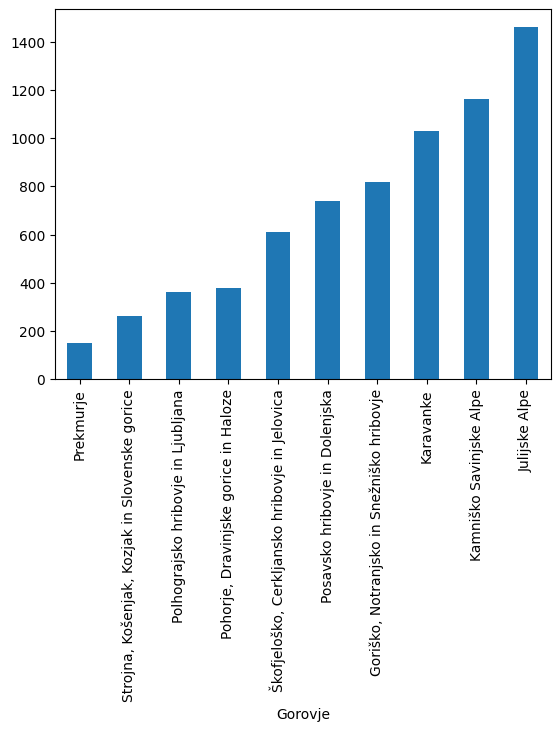

In [42]:
hribi_po_gorovju.Število_poti.sum().sort_values().plot.bar()

<Axes: xlabel='Gorovje', ylabel='Povprečno število poti na hrib'>

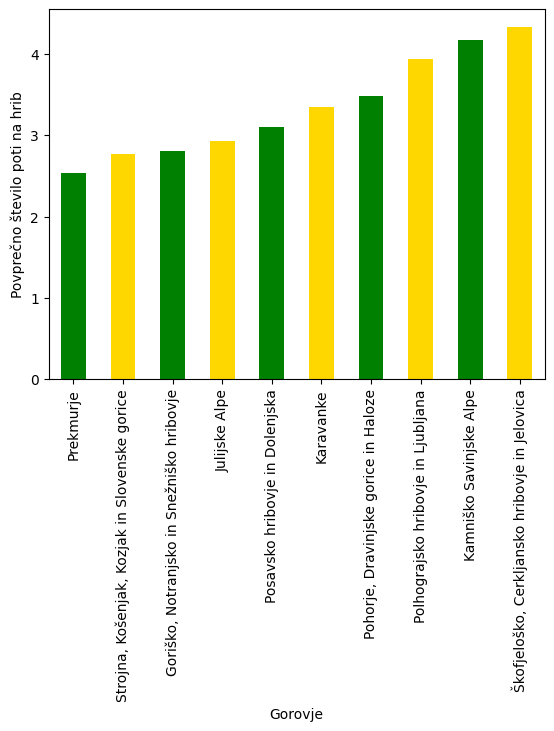

In [156]:
hribi_po_gorovju.Število_poti.mean().sort_values().plot.bar(ylabel='Povprečno število poti na hrib', color=['green', '#FFD700'])

**2.** *Višji hribi imajo zahtevnejše poti.*

'Prekmurje', 'Strojna, Košenjak, Kozjak in Slovenske gorice', 'Goriško, Notranjsko in Snežniško hribovje', 'Julijske Alpe', 'Posavsko hribovje in Dolenjska', 'Karavanke', 'Pohorje, Dravinjske gorice in Haloze', 'Polhograjsko hribovje in Ljubljana', 'Kamniško Savinjske Alpe', 'Škofjeloško, Cerkljansko hribovje in Jelovica'
TODO: 1.povezati ime hriba z njegovimi potmi,
2. Zahtevnost poti pretvoriti v število oziroma ordinalno spremenljivko, 
3. Za vsak hrib izračunati povprečje zahtevnosti poti, 
4. Primerjati višino hribov in njihovo povprečno zahtevnost (npr. scatter plot)

In [102]:
# Poiščemo vse možne zastevnosti
def zahtevnosti(datoteka):
    zahtevnostiSez = []
    with open (datoteka, 'r', encoding='utf-8') as dat:
        vrste = [vrsta.strip() for vrsta in dat]
        for vrsta in vrste:
            if vrste.index(vrsta) == 0:
                continue
            else:
                ime, visinska, zahtevnost, cas = vrsta.split(';')
                zahtevnostiSez.append(zahtevnost)
    zahtevnosti = set(zahtevnostiSez)
    return zahtevnosti
vse_zahtevnosti = zahtevnosti('potiMin.csv')
print(vse_zahtevnosti)


{'zelo zahtevna označena pot, zahtevno brezpotje', 'zahtevno brezpotje, zahtevna označena pot', 'delno zahtevna označena pot, delno zahtevna neoznačena pot', 'zahtevno brezpotje', 'zelo zahtevna označena pot, lahko brezpotje', 'lahka neoznačena steza, zahtevno brezpotje', 'lahka označena pot, lahka neoznačena steza', 'lahka neoznačena steza, lahka označena pot', 'zelo zahtevna označena pot, zahtevna neoznačena steza', 'delno zahtevna označena pot, lahko brezpotje', 'zahtevna označena pot, delno zahtevna neoznačena pot', 'lahka neoznačena steza, zahtevna označena pot', 'lahka označena pot, zahtevna označena pot', 'lahko brezpotje, zahtevna označena pot', 'lahko brezpotje, delno zahtevna označena pot', 'zelo zahtevna neoznačena steza', 'zahtevna označena pot', 'alpinistični vzpon', 'zahtevna neoznačena steza', 'zahtevna neoznačena steza, zahtevna označena pot', 'delno zahtevna neoznačena pot, lahka označena pot', 'zahtevna neoznačena steza, lahko brezpotje', 'lahka označena pot, delno za

In [ ]:

poti_zahtevnost = poti.Zahtevnost.replace(
    ['lahka označena pot','lahka neoznačena steza', 
'lahka označena pot, lahka neoznačena steza', 'lahka neoznačena steza, lahka označena pot', 
'lahka označena pot, lahka označena pot'], 1).replace(
    ['delno zahtevna označena pot', 'delno zahtevna neoznačena pot', 
'lahko brezpotje', 'lahka označena pot, lahko brezpotje', 
'lahko brezpotje, lahka označena pot', 'delno zahtevna označena pot, lahka neoznačena steza', 
'delno zahtevna neoznačena pot, lahka označena pot', 'delno zahtevna označena pot, delno zahtevna neoznačena pot', 
'delno zahtevna označena pot, lahko brezpotje', 'lahko brezpotje, delno zahtevna označena pot', 
'lahka označena pot, delno zahtevna neoznačena pot', 'lahko brezpotje, lahka neoznačena steza', 
'delno zahtevna neoznačena pot, lahko brezpotje', 'lahka označena pot, delno zahtevna označena pot', 
'delno zahtevna neoznačena pot, delno zahtevna označena pot', 'lahka neoznačena steza, delno zahtevna označena pot', 
'lahka neoznačena steza, delno zahtevna neoznačena pot','lahka neoznačena steza, lahko brezpotje'], 2).replace(
    ['zahtevna označena pot', 'zahtevna neoznačena steza', 
'zahtevno brezpotje', 'zahtevno brezpotje, zahtevna označena pot', 
'lahka neoznačena steza, zahtevno brezpotje', 'zahtevna označena pot, delno zahtevna neoznačena pot', 
'lahka neoznačena steza, zahtevna označena pot', 'lahka označena pot, zahtevna označena pot', 
'lahko brezpotje, zahtevna označena pot', 'zahtevna neoznačena steza, lahko brezpotje', 
'zahtevna označena pot, lahka neoznačena steza', 'delno zahtevna označena pot, zahtevno brezpotje', 
'lahka označena pot, zahtevno brezpotje', 'zahtevna označena pot, lahko brezpotje', 
'delno zahtevna neoznačena pot, zahtevna označena pot', 'zahtevna označena pot, zahtevno brezpotje',
'zahtevna neoznačena steza, lahka označena pot', 'zahtevno brezpotje, zahtevna neoznačena steza', 
'zahtevna neoznačena steza, zahtevna označena pot'], 3).replace(
    ['zelo zahtevna označena pot', 'zelo zahtevna neoznačena steza', 
'zelo zahtevno brezpotje', 'zelo zahtevna označena pot, zahtevno brezpotje', 
'zelo zahtevna označena pot, lahko brezpotje', 'zelo zahtevna označena pot, zahtevna neoznačena steza', 
'zelo zahtevna označena pot, delno zahtevna neoznačena pot', 'lahka neoznačena steza, zelo zahtevna označena pot', 
'delno zahtevna označena pot, zelo zahtevno brezpotje', 'zahtevno brezpotje, zelo zahtevna označena pot', 
'lahko brezpotje, zelo zahtevna označena pot', 'zelo zahtevna neoznačena steza, lahko brezpotje', 
'zelo zahtevna označena pot, lahka neoznačena steza', 'zelo zahtevna označena pot, zelo zahtevno brezpotje', 
'zelo zahtevna neoznačena steza, zahtevna označena pot'], 4).replace(
    ['izjemno zahtevna označena pot', 'alpinistični vzpon', 
'izjemno zahtevna označena pot, lahko brezpotje'], 5).replace('ni podatka', pd.NA)


poti_na_hrib = poti_zahtevnost.groupby('Ime').mean()
print(poti_na_hrib)

In [ ]:
skupaj_zahtevnost = pd.merge(poti_na_hrib, hribi, left_on='Ime', right_on='Ime')
skupaj_zahtevnost

In [ ]:
skupaj_zahtevnost.plot.scatter('Višina', 'Zahtevnost', color='green')
skupaj_zahtevnost_korelacija = skupaj_zahtevnost[['Višina', 'Zahtevnost']]
skupaj_zahtevnost_korelacija.corr(method='pearson')

**3.** *Če je na cilju koča, do cilja vodi več poti, kot do ciljev brez koč.*

Najprej sem prefiltriral cilje glede na to ali je na njih koča (cilji_koce) ali je ni (cilji_ni_koce). Opazim, da 1784 ciljev na vrhu nima koče in le na 323 ciljih stoji tudi koča.

In [186]:
cilji_koce = hribi.loc[hribi['Vrsta_cilja'].str.contains('koča')]
cilji_ni_koce = hribi.loc[~hribi['Vrsta_cilja'].str.contains('koča')].replace('', pd.NA)

In [ ]:
cilji_koce

In [ ]:
figure = plt.figure(1, figsize=(10,10))
fig = figure.add_subplot(111)
fig.set_ylabel('Število poti na hrib')
fig.set_xlabel('Poti s ciljem, na katerem je koča ali je ni')
fig.set_title('Primerjava ševila poti, ki vodijo do ciljev s kočo ali brez koče')
bp_cilji = plt.boxplot([cilji_koce['Število_poti'], cilji_ni_koce['Število_poti']], patch_artist=True, sym='#669900', meanline=True, showmeans=True, labels=['S kočo', 'Brez Koče'])
for box in bp_cilji['boxes']:
    box.set(color='#669900', linewidth=2)
    box.set(facecolor='#ffc61a', alpha=0.5)

for whisker in bp_cilji['whiskers']:
    whisker.set(color='#669900', linewidth=2, linestyle='dashed')

for cap in bp_cilji['caps']:
    cap.set(color='#669900', linewidth=2)

for median in bp_cilji['medians']:
    median.set(color='#669900', linestyle='dashed', linewidth=2, marker='', markersize=7)

for mean in bp_cilji['means']:
    mean.set(color='#669900', linestyle='solid', linewidth=2)

for flier in bp_cilji['fliers']:
    flier.set(marker='o', color= '#669900', alpha=0.4)
plt.show

In [ ]:
cilji_koce.Število_poti.mean()

In [ ]:
cilji_ni_koce.Število_poti.mean()

**4.** *V Julijskih alpah je največ zahtevnejših poti.*

najprej 
število poti glede na zahtevnost za vsako gorovje
Združil v eno tabelo zahtevnost poti in podatke o hribu



In [293]:
pz = poti_zahtevnost.to_frame()
pzSkupaj = pz.join(hribi, on='Ime')
pzSkupaj.groupby('Gorovje')
gorovja = ['Prekmurje', 'Strojna, Košenjak, Kozjak in Slovenske gorice', 'Goriško, Notranjsko in Snežniško hribovje', 
'Julijske Alpe', 'Posavsko hribovje in Dolenjska', 'Karavanke', 'Pohorje, Dravinjske gorice in Haloze', 
'Polhograjsko hribovje in Ljubljana', 'Kamniško Savinjske Alpe', 'Škofjeloško, Cerkljansko hribovje in Jelovica']


In [343]:
Združeno = pzSkupaj.groupby(['Gorovje', 'Zahtevnost']).size()
df_pzSkupaj = Združeno.to_frame('ŠtZahtevnih')
#.sort_values().plot(kind='bar', stacked=True, x='Gorovje')
#df_pzSkupaj.plot(kind='bar', stacked=True)
df_pzSkupaj

ŠtZahtevnih
Gorovje                                       Zahtevnost             
Goriško, Notranjsko in Snežniško hribovje     1                   773
                                              2                    33
                                              3                     7
                                              4                     5
Julijske Alpe                                 1                   755
...                                                               ...
Strojna, Košenjak, Kozjak in Slovenske gorice 2                     6
Škofjeloško, Cerkljansko hribovje in Jelovica 1                   581
                                              2                    28
                                              3                     3
                                              4                     4

[37 rows x 1 columns]

In [ ]:
pzSkupaj.groupby(['Gorovje', 'Zahtevnost']).plot(kind='bar', stacked=True)
gorovja = ['Prekmurje', 'Strojna, Košenjak, Kozjak in Slovenske gorice', 'Goriško, Notranjsko in Snežniško hribovje', 
'Julijske Alpe', 'Posavsko hribovje in Dolenjska', 'Karavanke', 'Pohorje, Dravinjske gorice in Haloze', 
'Polhograjsko hribovje in Ljubljana', 'Kamniško Savinjske Alpe', 'Škofjeloško, Cerkljansko hribovje in Jelovica']
df_gorovje = [pd.DataFrame(pzSkupaj[Gorovje].groupby('Zahtevnost').size()).rename(columns={0: Gorovje}) for Gorovje in gorovja]
letne_teme = pd.concat(df_gorovje, axis=1)
fig4 = plt.figure(1)
ax4 = fig4.add_subplot(111)
ax4.set_ylabel('Število poti glede na zahtevnost')
colors = ['#E28A1D', '#E2BC1D', '#D7E21D', '#A6E21D', '#75E21D', '#1DB5E2', '#1D84E2', '#1D53E2', '#1D21E2', '#4A1DE2', '#7B1DE2', '#901DE0'][::-1]
letne_teme.plot(kind='bar', ax=ax4, stacked=True, width=0.8, color=colors, title='Najbolj popularne letne teme')
